In [1]:
# Data Analytics Project by Aislinn Whelan

#Objective: To understand my company's Linkedin content to foster better engagement in the future, to improve Instagram reels and to spot content trends using the live Twitter API to predict trendable content for Linkedin & Instagram.


#Importing Linkedin stats from my company's live account through a .csv import.

#importing 'metrics' from each day on Linkedin between the time period of November 1st to Feb 28th.

import pandas as pd
linkedin = pd.read_csv('Linkedin_Analytics.csv')
linkedin.head()


,Date,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Reactions (organic),Reactions (sponsored),Reactions (total),Comments (organic),Comments (sponsored),Comments (total),Reposts (organic),Reposts (sponsored),Reposts (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
0,11/01/2022,2545,0,2545,723,66,0,66,38,0,38,0,0,0,0,0,0,0.040864,0,0.040864
1,11/02/2022,1813,0,1813,718,63,0,63,8,0,8,2,0,2,0,0,0,0.040265,0,0.040265
2,11/03/2022,2503,0,2503,1012,42,0,42,31,0,31,1,0,1,10,0,10,0.033560,0,0.033560
3,11/04/2022,1923,0,1923,753,46,0,46,15,0,15,1,0,1,1,0,1,0.032761,0,0.032761
4,11/05/2022,750,0,750,292,28,0,28,2,0,2,0,0,0,0,0,0,0.040000,0,0.040000


In [2]:
# checking the number of rows
print(linkedin.shape[0])

120


In [3]:
# checking for duplicates in DataFrame
linkedin.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Length: 120, dtype: bool

In [4]:
print(linkedin.duplicated().sum())

0


In [5]:
# checking for missing values
missing_values = linkedin.isnull().sum()
print(missing_values)

Date                            0
Impressions (organic)           0
Impressions (sponsored)         0
Impressions (total)             0
Unique impressions (organic)    0
Clicks (organic)                0
Clicks (sponsored)              0
Clicks (total)                  0
Reactions (organic)             0
Reactions (sponsored)           0
Reactions (total)               0
Comments (organic)              0
Comments (sponsored)            0
Comments (total)                0
Reposts (organic)               0
Reposts (sponsored)             0
Reposts (total)                 0
Engagement rate (organic)       0
Engagement rate (sponsored)     0
Engagement rate (total)         0
dtype: int64


In [6]:
# I will drop both the 'sponsored' and 'organic' tabs to just leave me with the 'total' tabs. This will give me a cleaner dataset

In [7]:
# dropping 'sponsored' tabs

In [8]:
linkedin_cleaned_s = linkedin.drop(['Engagement rate (sponsored)','Impressions (sponsored)', 'Clicks (sponsored)', 'Reactions (sponsored)', 'Comments (sponsored)', 'Reposts (sponsored)'], axis=1)
linkedin_cleaned_s.head()


,Date,Impressions (organic),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (total),Reactions (organic),Reactions (total),Comments (organic),Comments (total),Reposts (organic),Reposts (total),Engagement rate (organic),Engagement rate (total)
0,11/01/2022,2545,2545,723,66,66,38,38,0,0,0,0,0.040864,0.040864
1,11/02/2022,1813,1813,718,63,63,8,8,2,2,0,0,0.040265,0.040265
2,11/03/2022,2503,2503,1012,42,42,31,31,1,1,10,10,0.033560,0.033560
3,11/04/2022,1923,1923,753,46,46,15,15,1,1,1,1,0.032761,0.032761
4,11/05/2022,750,750,292,28,28,2,2,0,0,0,0,0.040000,0.040000


In [9]:
# dropping 'organic' tabs to leave me with just the 'total' tabs
linkedin_cleaned = linkedin_cleaned_s.drop(['Engagement rate (organic)','Impressions (organic)', 'Clicks (organic)', 'Reactions (organic)', 'Comments (organic)', 'Reposts (organic)'], axis=1)
linkedin_cleaned.head()

,Date,Impressions (total),Unique impressions (organic),Clicks (total),Reactions (total),Comments (total),Reposts (total),Engagement rate (total)
0,11/01/2022,2545,723,66,38,0,0,0.040864
1,11/02/2022,1813,718,63,8,2,0,0.040265
2,11/03/2022,2503,1012,42,31,1,10,0.033560
3,11/04/2022,1923,753,46,15,1,1,0.032761
4,11/05/2022,750,292,28,2,0,0,0.040000


In [10]:
# renaming columns to clean the dataset further

In [11]:
linkedin_renamed = linkedin_cleaned.rename(columns={'Impressions (total)': 'Impressions',
                        'Unique impressions (organic)': 'Unique_Impressions',
                        'Clicks (total)': 'Clicks',
                        'Reactions (total)': 'Reactions', 'Comments (total)': 'Comments', 'Reposts (total)': 'Reposts', 'Engagement rate (total)': 'Engagement Rate'})
linkedin_renamed.head()

,Date,Impressions,Unique_Impressions,Clicks,Reactions,Comments,Reposts,Engagement Rate
0,11/01/2022,2545,723,66,38,0,0,0.040864
1,11/02/2022,1813,718,63,8,2,0,0.040265
2,11/03/2022,2503,1012,42,31,1,10,0.033560
3,11/04/2022,1923,753,46,15,1,1,0.032761
4,11/05/2022,750,292,28,2,0,0,0.040000


In [12]:
# checking number of rows after cleaning
rows = linkedin_renamed.shape[0]
print(rows)

120


In [13]:
# sorting column 'impressions' to see what date had the highest impressions

In [14]:
linkedin_renamed.sort_values(by='Impressions', ascending=False, inplace=True)
linkedin_renamed.head()

,Date,Impressions,Unique_Impressions,Clicks,Reactions,Comments,Reposts,Engagement Rate
83,01/23/2023,7831,3774,323,23,1,1,0.044439
48,12/19/2022,7289,3737,234,26,1,0,0.035807
104,02/13/2023,7144,4015,351,20,2,1,0.052352
93,02/02/2023,6299,2953,419,22,1,0,0.070170
76,01/16/2023,5973,2894,171,16,0,2,0.031642


In [15]:
#importing 'all posts data' from each day on Linkedin between the time period of November 1st to Feb 28th.

import pandas as pd
linkedin_allposts = pd.read_csv('Linkedin_Analytics_all_posts.csv', encoding='ISO-8859-1')
linkedin_allposts.head()

,Post title,Post link,Post type,Campaign name,Posted by,Created date,Campaign start date,Campaign end date,Audience,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Follows,Engagement rate,Content Type
0,Don't forget ??\n\nOur webinar is tomorrow ??\...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Aislinn Whelan,02/28/2023,NaN,NaN,All followers,292,NaN,2,0.006849,2,0,1,NaN,0.017123,NaN
1,CX behavior models & how they can help you to ...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Aislinn Whelan,02/28/2023,NaN,NaN,All followers,879,NaN,13,0.014790,4,0,0,NaN,0.019340,NaN
2,Congratulations Michael ?? \n\nBest of luck in...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Aislinn Whelan,02/28/2023,NaN,NaN,All followers,764,NaN,12,0.015707,9,0,0,NaN,0.027487,NaN
3,'Celebrate' for working from home ?? | 'Like' ...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Aislinn Whelan,02/27/2023,NaN,NaN,All followers,11031,NaN,503,0.045599,255,6,0,NaN,0.069169,NaN
4,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Aislinn Whelan,02/27/2023,NaN,NaN,All followers,555,NaN,7,0.012613,4,0,0,NaN,0.019820,NaN


In [16]:
# checking the number of rows
print(linkedin_allposts.shape[0])

290


In [17]:
# dropping irrelavent columns
import pandas as pd

linkedin_allposts = pd.read_csv('Linkedin_Analytics_all_posts.csv', encoding='ISO-8859-1')
print(linkedin_allposts.shape[0])
linkedin_allposts.head()

# dropping irrelevant columns
linkedin_allposts_drop = linkedin_allposts.drop(['Post link','Post type', 'Posted by', 'Campaign start date', 'Campaign end date', 'Audience', 'Follows','Campaign name', 'Content Type'], axis=1)
linkedin_allposts_drop.head()

290


,Post title,Created date,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Engagement rate
0,Don't forget ??\n\nOur webinar is tomorrow ??\...,02/28/2023,292,NaN,2,0.006849,2,0,1,0.017123
1,CX behavior models & how they can help you to ...,02/28/2023,879,NaN,13,0.014790,4,0,0,0.019340
2,Congratulations Michael ?? \n\nBest of luck in...,02/28/2023,764,NaN,12,0.015707,9,0,0,0.027487
3,'Celebrate' for working from home ?? | 'Like' ...,02/27/2023,11031,NaN,503,0.045599,255,6,0,0.069169
4,NaN,02/27/2023,555,NaN,7,0.012613,4,0,0,0.019820


In [18]:
# checking 'post title' column displays ok 
print(linkedin_allposts_drop['Post title'])

0      Don't forget ??\n\nOur webinar is tomorrow ??\...
1      CX behavior models & how they can help you to ...
2      Congratulations Michael ?? \n\nBest of luck in...
3      'Celebrate' for working from home ?? | 'Like' ...
4                                                    NaN
                             ...                        
285    Congratulations on completing your Professiona...
286    Congratulations on completing your Professiona...
287    Congratulations on completing your Professiona...
288    Congratulations on completing your Professiona...
289    Congratulations on completing your Professiona...
Name: Post title, Length: 290, dtype: object


In [19]:
#loading 'post title' with full width
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Load the data and print the Post title column
linkedin_allposts = pd.read_csv('Linkedin_Analytics_all_posts.csv', encoding='ISO-8859-1')
print(linkedin_allposts['Post title'].head())

0                                                                                                                                                                                                                                                                                                                                                                                                   Don't forget ??\n\nOur webinar is tomorrow ??\nLink to register: https://hubs.la/Q01DCXgW0\n\n#mba #smurfit #economics #ireland
1    CX behavior models & how they can help you to understand your customer better ??\n\nThe Learning Model was influenced by 'Abraham Maslow's Hierarchy of Needs', the model illustrates that consumers will meet their basic needs first before climbing up the funnel. This model is particularly popular in CX to allow marketer's to better understand where their product sits in the model.\n\nWhere does your product sit?\n\n#cx #customerexperience #marketing #marketingtips #sales #dig

In [20]:
# truncate the post title to make it easier to read
linkedin_allposts['Post title'] = linkedin_allposts['Post title'].str[:50]
print(linkedin_allposts['Post title'].head())

0    Don't forget ??\n\nOur webinar is tomorrow ??\nLink t
1       CX behavior models & how they can help you to unde
2     Congratulations Michael ?? \n\nBest of luck in your 
3       'Celebrate' for working from home ?? | 'Like' for 
4                                                      NaN
Name: Post title, dtype: object


In [21]:
# checking for duplicates in DataFrame
linkedin_allposts_drop.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
285    False
286    False
287    False
288    False
289    False
Length: 290, dtype: bool

In [22]:
# checking for missing values
missing_values_posts = linkedin_allposts_drop.isnull().sum()
print(missing_values_posts)

Post title                   48
Created date                  0
Impressions                   0
Views                       279
Clicks                        0
Click through rate (CTR)      0
Likes                         0
Comments                      0
Reposts                       0
Engagement rate               0
dtype: int64


In [23]:
print(linkedin_allposts_drop['Views'])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
285   NaN
286   NaN
287   NaN
288   NaN
289   NaN
Name: Views, Length: 290, dtype: float64


In [24]:
# checking the number of rows
print(linkedin_allposts_drop.shape[0])

290


In [25]:
#dropping 'views' as there is too much data missing

linkedin_allposts_clean = linkedin_allposts_drop.drop(['Views'], axis=1)
linkedin_allposts_clean.head()


,Post title,Created date,Impressions,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Engagement rate
0,Don't forget ??\n\nOur webinar is tomorrow ??\nLink to register: https://hubs.la/Q01DCXgW0\n\n#mba #smurfit #economics #ireland,02/28/2023,292,2,0.006849,2,0,1,0.017123
1,"CX behavior models & how they can help you to understand your customer better ??\n\nThe Learning Model was influenced by 'Abraham Maslow's Hierarchy of Needs', the model illustrates that consumers will meet their basic needs first before climbing up the funnel. This model is particularly popular in CX to allow marketer's to better understand where their product sits in the model.\n\nWhere does your product sit?\n\n#cx #customerexperience #marketing #marketingtips #sales #digitalmarketing #thelearningmodel",02/28/2023,879,13,0.014790,4,0,0,0.019340
2,Congratulations Michael ?? \n\nBest of luck in your job search ?? \n\n#dataanalytics,02/28/2023,764,12,0.015707,9,0,0,0.027487
3,"'Celebrate' for working from home ?? | 'Like' for Hybrid ??\n\nWhat does your working arrangements look like, and do you think it works? Let us know below??\n\n#workingfromhome #hybridworking #jobs #career #ireland #dublin",02/27/2023,11031,503,0.045599,255,6,0,0.069169
4,NaN,02/27/2023,555,7,0.012613,4,0,0,0.019820


In [26]:


# creating a dictionary from February Instagram Reels Data

import pandas as pd

Feb_Insta_Reels = [
    {'Reel': 'Difficult Work Conversations', 'Duration': '00:00:10', 'Publish Date': '02/23/2023', 'Likes': 3, 'Comments': 0, 'Saves': 5, 'Watch Time': '00:26:33', 'Avg Watch Time': '00:00:04', 'Plays': 345, 'Reach': 312},
    {'Reel': 'Funny Cat Video', 'Duration': '00:00:24', 'Publish Date': '02/15/2023', 'Likes': 8, 'Comments': 4, 'Saves': 0, 'Watch Time': '02:08:22', 'Avg Watch Time': '00:00:04', 'Plays': 1521, 'Reach': 1444},
    {'Reel': 'Easy Wins SEO', 'Duration': '00:00:35', 'Publish Date': '02/08/2023', 'Likes': 1, 'Comments': 0, 'Saves': 1, 'Watch Time': '00:16:21', 'Avg Watch Time': '00:00:03', 'Plays': 228, 'Reach': 221},
    {'Reel': 'Google blogs', 'Duration': '00:01:09', 'Publish Date': '02/01/2023', 'Likes': 10, 'Comments': 0, 'Saves': 2, 'Watch Time': '00:45:17', 'Avg Watch Time': '00:00:06', 'Plays': 402, 'Reach': 359}
]

Feb_Insta_Reels = pd.DataFrame(Feb_Insta_Reels)
Feb_Insta_Reels.head()




,Reel,Duration,Publish Date,Likes,Comments,Saves,Watch Time,Avg Watch Time,Plays,Reach
0,Difficult Work Conversations,00:00:10,02/23/2023,3,0,5,00:26:33,00:00:04,345,312
1,Funny Cat Video,00:00:24,02/15/2023,8,4,0,02:08:22,00:00:04,1521,1444
2,Easy Wins SEO,00:00:35,02/08/2023,1,0,1,00:16:21,00:00:03,228,221
3,Google blogs,00:01:09,02/01/2023,10,0,2,00:45:17,00:00:06,402,359


In [27]:
# creating a dictionary of January Instagrm Reels Data


Jan_Insta_Reels = [
    {'Reel': 'SEO hacks 1', 'Duration': '00:00:58', 'Publish Date': '01/25/2023', 'Likes': 14, 'Comments': 3, 'Saves': 8, 'Watch Time': '00:42:57', 'Avg Watch Time': '00:00:06', 'Plays': 381, 'Reach': 347},
    {'Reel': 'What is ChatGPT', 'Duration': '00:00:26', 'Publish Date': '01/18/2023', 'Likes': 15, 'Comments': 0, 'Saves': 8, 'Watch Time': '00:55:08', 'Avg Watch Time': '00:00:05', 'Plays': 565, 'Reach': 498},
    {'Reel': 'SEO Blogs', 'Duration': '00:00:38', 'Publish Date': '01/11/2023', 'Likes': 6, 'Comments': 1, 'Saves': 5, 'Watch Time': '00:27:20', 'Avg Watch Time': '00:00:04', 'Plays': 355, 'Reach': 320},
    {'Reel': 'Crious Mind', 'Duration': '00:00:09', 'Publish Date': '01/05/2023', 'Likes': 12, 'Comments': 1, 'Saves': 1, 'Watch Time': '00:26:27', 'Avg Watch Time': '00:00:03', 'Plays': 381, 'Reach': 387}
]

Jan_Insta_Reels = pd.DataFrame(Jan_Insta_Reels)
Jan_Insta_Reels.head()


,Reel,Duration,Publish Date,Likes,Comments,Saves,Watch Time,Avg Watch Time,Plays,Reach
0,SEO hacks 1,00:00:58,01/25/2023,14,3,8,00:42:57,00:00:06,381,347
1,What is ChatGPT,00:00:26,01/18/2023,15,0,8,00:55:08,00:00:05,565,498
2,SEO Blogs,00:00:38,01/11/2023,6,1,5,00:27:20,00:00:04,355,320
3,Crious Mind,00:00:09,01/05/2023,12,1,1,00:26:27,00:00:03,381,387


In [28]:
# creating a dictionary of December Instagram Reels Data


Dec_Insta_Reels = [
    {'Reel': 'Job offer', 'Duration': '00:00:31', 'Publish Date': '12/21/2022', 'Likes': 7, 'Comments': 4, 'Saves': 4, 'Watch Time': '00:48:08', 'Avg Watch Time': '00:00:06', 'Plays': 438, 'Reach': 393},
    {'Reel': 'Christmas Offer', 'Duration': '00:00:10', 'Publish Date': '12/19/2022', 'Likes': 6, 'Comments': 3, 'Saves': 1, 'Watch Time': '00:23:46', 'Avg Watch Time': '00:00:03', 'Plays': 439, 'Reach': 378},
    {'Reel': 'Why study with us', 'Duration': '00:00:13', 'Publish Date': '12/14/2022', 'Likes': 9, 'Comments': 2, 'Saves': 1, 'Watch Time': '00:35:05', 'Avg Watch Time': '00:00:03', 'Plays': 652, 'Reach': 620}
]

Dec_Insta_Reels = pd.DataFrame(Dec_Insta_Reels)
Dec_Insta_Reels.head()


,Reel,Duration,Publish Date,Likes,Comments,Saves,Watch Time,Avg Watch Time,Plays,Reach
0,Job offer,00:00:31,12/21/2022,7,4,4,00:48:08,00:00:06,438,393
1,Christmas Offer,00:00:10,12/19/2022,6,3,1,00:23:46,00:00:03,439,378
2,Why study with us,00:00:13,12/14/2022,9,2,1,00:35:05,00:00:03,652,620


In [29]:
#concatenating the three dataframes

Instagram_reels = pd.concat([Feb_Insta_Reels, Jan_Insta_Reels, Dec_Insta_Reels], ignore_index=True)
Instagram_reels.head(20)

,Reel,Duration,Publish Date,Likes,Comments,Saves,Watch Time,Avg Watch Time,Plays,Reach
0,Difficult Work Conversations,00:00:10,02/23/2023,3,0,5,00:26:33,00:00:04,345,312
1,Funny Cat Video,00:00:24,02/15/2023,8,4,0,02:08:22,00:00:04,1521,1444
2,Easy Wins SEO,00:00:35,02/08/2023,1,0,1,00:16:21,00:00:03,228,221
3,Google blogs,00:01:09,02/01/2023,10,0,2,00:45:17,00:00:06,402,359
4,SEO hacks 1,00:00:58,01/25/2023,14,3,8,00:42:57,00:00:06,381,347
5,What is ChatGPT,00:00:26,01/18/2023,15,0,8,00:55:08,00:00:05,565,498
6,SEO Blogs,00:00:38,01/11/2023,6,1,5,00:27:20,00:00:04,355,320
7,Crious Mind,00:00:09,01/05/2023,12,1,1,00:26:27,00:00:03,381,387
8,Job offer,00:00:31,12/21/2022,7,4,4,00:48:08,00:00:06,438,393
9,Christmas Offer,00:00:10,12/19/2022,6,3,1,00:23:46,00:00:03,439,378


In [30]:

# Analyising the different datasets

# using a for loop to print any linkedin posts where the impressions were greater than 10,000

for index, row in linkedin_allposts_clean.iterrows():
    if row['Impressions'] > 10000:
        print(row['Post title'])


'Celebrate' for working from home ?? | 'Like' for Hybrid ??

What does your working arrangements look like, and do you think it works? Let us know below??

#workingfromhome #hybridworking #jobs #career #ireland #dublin
1 hour lunch please! Eating takes time ?? ??

#thelunchdebate #workinghours #lunch  


In [31]:
# these two posts were 'reaction' posts that required the user to simply react to the post using a thumbs up or similar emoji

# using a for loop to print any linkedin posts where the clicks were greater than 1000

for index, row in linkedin_allposts_clean.iterrows():
    if row['Clicks'] >= 1000:
        print(row['Post title'])

Individuals working in HR have the power to transform the entire organisation and shape the company culture for the better ?? 

If you are thinking about pursuing a career in HR then check out our recent blog. In this blog we compiled a helpful guide to various HR career paths ?? 

https://lnkd.in/gCkfEvXi


#hr #hrcommunity #hrcareers #humanresources #humanresourcesmanagement #culture #power #career 


In [32]:
# using a for loop to print any linkedin posts where the comments were greater than 5

for index, row in linkedin_allposts_clean.iterrows():
    if row['Comments'] >= 5:
        print(row['Post title'])

'Celebrate' for working from home ?? | 'Like' for Hybrid ??

What does your working arrangements look like, and do you think it works? Let us know below??

#workingfromhome #hybridworking #jobs #career #ireland #dublin
Some students have been using ChatGPT, a text-based bot, to do their homework for them. Now, 22-year-old Edward Tian's new app is attracting educators working to combat AI plagiarism. 

With the rise of ChatGPT, do you think this will be revolutionary in a good or bad way? ?? Leave your thoughts below ?? 

#chatgpt #ai 
If you're looking for a midweek pick-me-up, our team is up and at 'em at #IITD22! 

Stop by our stand to discuss your upskilling and reskilling goals for the year ahead, and find out how we can help. 


In [33]:
# combining for loops into one line of code to print the most successful Linkedin post 

for index, row in linkedin_allposts_clean.iterrows():
    if row['Impressions'] > 1000 and row['Clicks'] >= 100 and row['Comments'] >= 5 and row['Likes'] >= 20 and row['Reposts'] >= 2:
        print(row['Post title'])

Some students have been using ChatGPT, a text-based bot, to do their homework for them. Now, 22-year-old Edward Tian's new app is attracting educators working to combat AI plagiarism. 

With the rise of ChatGPT, do you think this will be revolutionary in a good or bad way? ?? Leave your thoughts below ?? 

#chatgpt #ai 
If you're looking for a midweek pick-me-up, our team is up and at 'em at #IITD22! 

Stop by our stand to discuss your upskilling and reskilling goals for the year ahead, and find out how we can help. 


In [34]:
#finding the index number of ths post

index = linkedin_allposts_clean.index[linkedin_allposts_clean['Post title'] == "Some students have been using ChatGPT, a text-based bot, to do their homework for them. Now, 22-year-old Edward Tian's new app is attracting educators working to combat AI plagiarism. \n\nWith the rise of ChatGPT, do you think this will be revolutionary in a good or bad way? ?? Leave your thoughts below ?? \n\n#chatgpt #ai "][0]
print(index)


128


In [35]:
# finding out the engagement rate for this post 
print(linkedin_allposts_clean.loc[128, 'Engagement rate'])


0.033978987


In [36]:
# is this the highest engagement rate in the dataset?
linkedin_allposts_clean = linkedin_allposts_clean.reset_index().rename(columns={'index': 'post_index'})

for index, row in linkedin_allposts_clean.iterrows():
    if row['Engagement rate'] >= 0.033978987:
        print(row['post_index'])

3
6
8
9
10
14
16
20
22
25
27
32
33
35
39
44
54
55
59
60
64
66
69
71
76
79
86
88
89
90
93
97
98
100
101
103
107
109
110
111
112
115
119
122
126
127
128
130
133
134
135
136
139
140
141
142
143
149
150
152
153
156
158
166
171
174
175
177
178
179
181
182
183
184
187
192
198
215
217
218
219
222
225
229
230
233
235
238
239
246
248
249
253
260
261
272
274
275
276
279
281
283
285
288
289


In [37]:
# finding the highest engagement rate 
highest_engagement_rate = linkedin_allposts_clean['Engagement rate'].max()
print(highest_engagement_rate)

0.458458096


In [38]:
for index, row in linkedin_allposts_clean.iterrows():
    if row['Engagement rate'] == 0.458458096:
        print(row['Post title'])

Individuals working in HR have the power to transform the entire organisation and shape the company culture for the better ?? 

If you are thinking about pursuing a career in HR then check out our recent blog. In this blog we compiled a helpful guide to various HR career paths ?? 

https://lnkd.in/gCkfEvXi


#hr #hrcommunity #hrcareers #humanresources #humanresourcesmanagement #culture #power #career 


In [39]:
# printing all stats for this row 

row = linkedin_allposts_clean.loc[linkedin_allposts_clean['Post title'] == "Individuals working in HR have the power to transform the entire organisation and shape the company culture for the better ?? \n\nIf you are thinking about pursuing a career in HR then check out our recent blog. In this blog we compiled a helpful guide to various HR career paths ?? \n\nhttps://lnkd.in/gCkfEvXi\n\n\n#hr #hrcommunity #hrcareers #humanresources #humanresourcesmanagement #culture #power #career "]
print(row)

     post_index  \
111         111   

                                                                                                                                                                                                                                                                                                                                                                                                                      Post title  \
111  Individuals working in HR have the power to transform the entire organisation and shape the company culture for the better ?? \n\nIf you are thinking about pursuing a career in HR then check out our recent blog. In this blog we compiled a helpful guide to various HR career paths ?? \n\nhttps://lnkd.in/gCkfEvXi\n\n\n#hr #hrcommunity #hrcareers #humanresources #humanresourcesmanagement #culture #power #career    

    Created date  Impressions  Clicks  Click through rate (CTR)  Likes  \
111   01/18/2023         2672    1202         

In [40]:
#renaming this variable so I can use it later for further analysis 

Linkedin_Top_Post = row
Linkedin_Top_Post.head()

,post_index,Post title,Created date,Impressions,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Engagement rate
111,111,Individuals working in HR have the power to transform the entire organisation and shape the company culture for the better ?? \n\nIf you are thinking about pursuing a career in HR then check out our recent blog. In this blog we compiled a helpful guide to various HR career paths ?? \n\nhttps://lnkd.in/gCkfEvXi\n\n\n#hr #hrcommunity #hrcareers #humanresources #humanresourcesmanagement #culture #power #career,01/18/2023,2672,1202,0.44985,20,1,3,0.458458


In [41]:
#finding the lowest engagement rate
lowest_engagement_rate = linkedin_allposts_clean['Engagement rate'].min()
print(lowest_engagement_rate)


0.0


In [42]:
for index, row in linkedin_allposts_clean.iterrows():
    if row['Engagement rate'] == 0.0:
        print(row['Post title'])

Congratulations Caroline ?? 

#hrmanagement 
nan


In [43]:
#Calculating the mean engagment rate using the groupby function
mean_engagement_rate = linkedin_allposts_clean['Engagement rate'].mean()
print(mean_engagement_rate)


0.04063878969310345


In [44]:
max_engagement_rate = linkedin_allposts_clean['Engagement rate'].max()
mean_engagement_rate = linkedin_allposts_clean['Engagement rate'].mean()

if max_engagement_rate > mean_engagement_rate:
    print("The highest engagement rate is greater than the mean engagement rate.")
else:
    print("The highest engagement rate is not greater than the mean engagement rate.")


The highest engagement rate is greater than the mean engagement rate.


In [45]:
percentage_difference = ((max_engagement_rate - mean_engagement_rate) / mean_engagement_rate) * 100
print(f"The highest engagement rate is {percentage_difference:.2f}% higher than the mean engagement rate.")


The highest engagement rate is 1028.13% higher than the mean engagement rate.


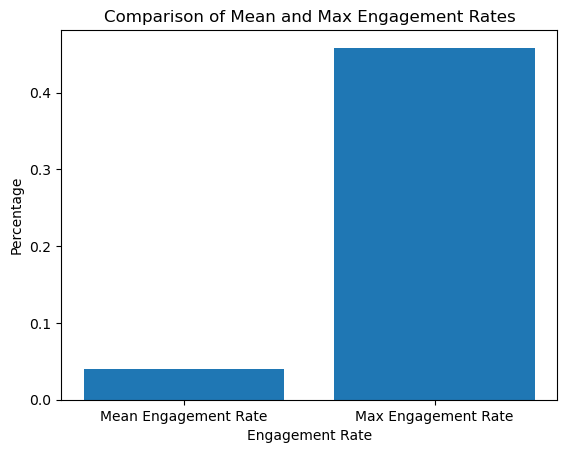

In [46]:
#visualising the results
import matplotlib.pyplot as plt

# Get the max engagement rate and mean engagement rate
max_engagement_rate = linkedin_allposts_clean['Engagement rate'].max()
mean_engagement_rate = linkedin_allposts_clean['Engagement rate'].mean()

# Create a bar chart
plt.bar(['Mean Engagement Rate', 'Max Engagement Rate'], [mean_engagement_rate, max_engagement_rate])

# Add labels and title
plt.xlabel('Engagement Rate')
plt.ylabel('Percentage')
plt.title('Comparison of Mean and Max Engagement Rates')

# Display the plot
plt.show()

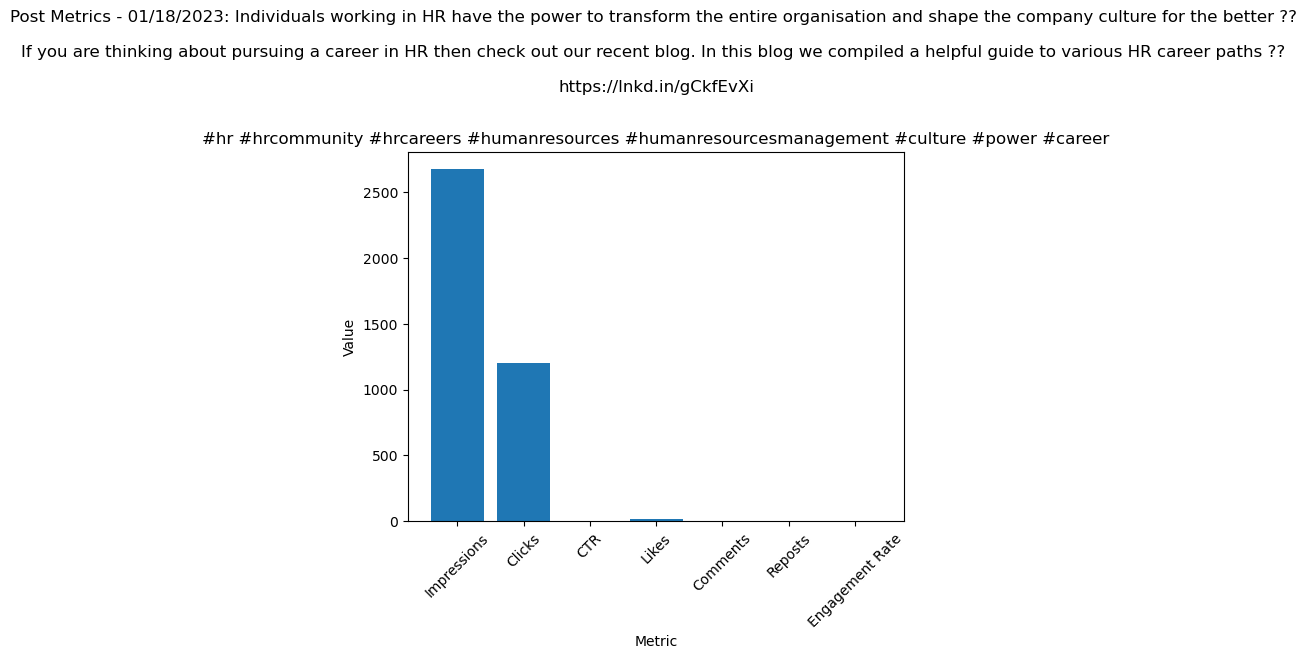

In [47]:
# plotting the row with the highest engagement
post_title = "Individuals working in HR have the power to transform the entire organisation and shape the company culture for the better ?? \n\nIf you are thinking about pursuing a career in HR then check out our recent blog. In this blog we compiled a helpful guide to various HR career paths ?? \n\nhttps://lnkd.in/gCkfEvXi\n\n\n#hr #hrcommunity #hrcareers #humanresources #humanresourcesmanagement #culture #power #career"
created_date = "01/18/2023"
impressions = 2672
clicks = 1202
ctr = 0.44985
likes = 20
comments = 1
reposts = 3
engagement_rate = 0.458458

# Define the x-axis categories
categories = ['Impressions', 'Clicks', 'CTR', 'Likes', 'Comments', 'Reposts', 'Engagement Rate']

# Define the data points
data = [impressions, clicks, ctr, likes, comments, reposts, engagement_rate]

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(categories, data)

# Add labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.set_title('Post Metrics - ' + created_date + ': ' + post_title)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


In [48]:
#calling Instagram reels dataframe to analyise

Instagram_reels.head(20)

,Reel,Duration,Publish Date,Likes,Comments,Saves,Watch Time,Avg Watch Time,Plays,Reach
0,Difficult Work Conversations,00:00:10,02/23/2023,3,0,5,00:26:33,00:00:04,345,312
1,Funny Cat Video,00:00:24,02/15/2023,8,4,0,02:08:22,00:00:04,1521,1444
2,Easy Wins SEO,00:00:35,02/08/2023,1,0,1,00:16:21,00:00:03,228,221
3,Google blogs,00:01:09,02/01/2023,10,0,2,00:45:17,00:00:06,402,359
4,SEO hacks 1,00:00:58,01/25/2023,14,3,8,00:42:57,00:00:06,381,347
5,What is ChatGPT,00:00:26,01/18/2023,15,0,8,00:55:08,00:00:05,565,498
6,SEO Blogs,00:00:38,01/11/2023,6,1,5,00:27:20,00:00:04,355,320
7,Crious Mind,00:00:09,01/05/2023,12,1,1,00:26:27,00:00:03,381,387
8,Job offer,00:00:31,12/21/2022,7,4,4,00:48:08,00:00:06,438,393
9,Christmas Offer,00:00:10,12/19/2022,6,3,1,00:23:46,00:00:03,439,378


In [49]:
# adding an engagement rate column to the dataframe using a custom function
Instagram_reels['Engagement Rate'] = (Instagram_reels['Likes'] + Instagram_reels['Comments'] + Instagram_reels['Saves']) / Instagram_reels['Reach']


In [50]:
Instagram_reels.head(20)

,Reel,Duration,Publish Date,Likes,Comments,Saves,Watch Time,Avg Watch Time,Plays,Reach,Engagement Rate
0,Difficult Work Conversations,00:00:10,02/23/2023,3,0,5,00:26:33,00:00:04,345,312,0.025641
1,Funny Cat Video,00:00:24,02/15/2023,8,4,0,02:08:22,00:00:04,1521,1444,0.008310
2,Easy Wins SEO,00:00:35,02/08/2023,1,0,1,00:16:21,00:00:03,228,221,0.009050
3,Google blogs,00:01:09,02/01/2023,10,0,2,00:45:17,00:00:06,402,359,0.033426
4,SEO hacks 1,00:00:58,01/25/2023,14,3,8,00:42:57,00:00:06,381,347,0.072046
5,What is ChatGPT,00:00:26,01/18/2023,15,0,8,00:55:08,00:00:05,565,498,0.046185
6,SEO Blogs,00:00:38,01/11/2023,6,1,5,00:27:20,00:00:04,355,320,0.037500
7,Crious Mind,00:00:09,01/05/2023,12,1,1,00:26:27,00:00:03,381,387,0.036176
8,Job offer,00:00:31,12/21/2022,7,4,4,00:48:08,00:00:06,438,393,0.038168
9,Christmas Offer,00:00:10,12/19/2022,6,3,1,00:23:46,00:00:03,439,378,0.026455


In [51]:
# sorting for the highest engagement rate 
highest_engagement = Instagram_reels.sort_values(by='Engagement Rate', ascending=False).iloc[0]
print(highest_engagement)

Reel               SEO hacks 1
Duration              00:00:58
Publish Date        01/25/2023
Likes                       14
Comments                     3
Saves                        8
Watch Time            00:42:57
Avg Watch Time        00:00:06
Plays                      381
Reach                      347
Engagement Rate       0.072046
Name: 4, dtype: object


In [52]:
# using NumPy to calculate the engagement mean

import numpy as np

engagement_rate_mean = np.mean(Instagram_reels['Engagement Rate'])
print(engagement_rate_mean)

0.032028326882218065


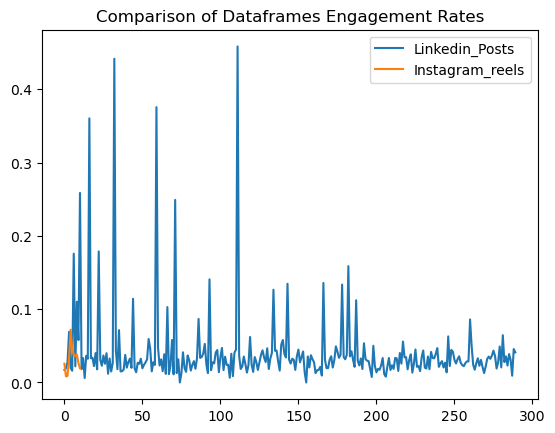

In [53]:
# Read the first dataframe
df1 = linkedin_allposts_clean

# Read the second dataframe
df2 = Instagram_reels

# Plot the dataframes on the same column
plt.plot(df1['Engagement rate'], label='Linkedin_Posts')
plt.plot(df2['Engagement Rate'], label='Instagram_reels')

# Add title and legend to the plot
plt.title('Comparison of Dataframes Engagement Rates')
plt.legend()

# Show the plot
plt.show()

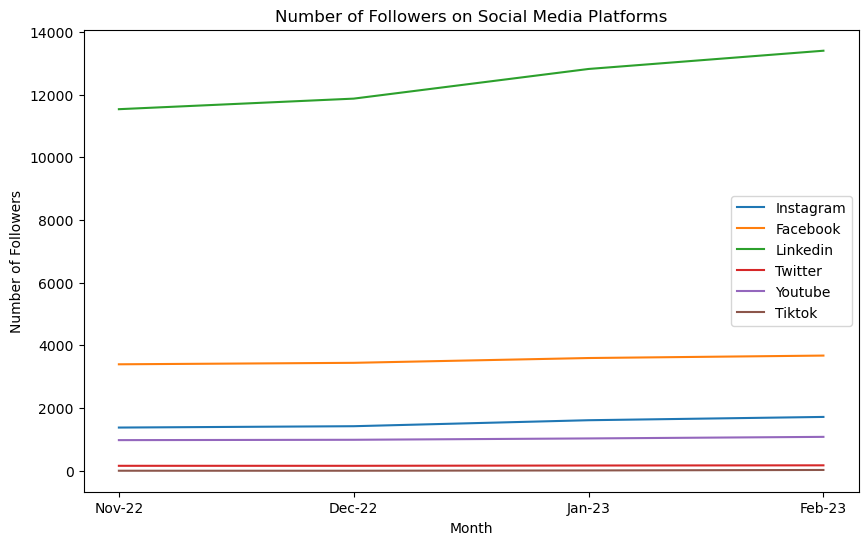

In [54]:
# plotting a line graph to illustrate the companies social channel growth in followers
import matplotlib.pyplot as plt

# creating the ditionary
socials = {
    'Instagram': [1377, 1420, 1611, 1716],
    'Facebook': [3395, 3442, 3595, 3673],
    'Linkedin': [11533, 11870, 12816, 13398],
    'Twitter': [157, 157, 166, 172],
    'Youtube': [976, 987, 1030, 1080],
    'Tiktok': [0, 0, 9, 24]
}

# create the plot
plt.figure(figsize=(10,6))
for platform, followers in socials.items():
    plt.plot(['Nov-22', 'Dec-22', 'Jan-23', 'Feb-23'], followers, label=platform)

# customize the plot
plt.title('Number of Followers on Social Media Platforms')
plt.xlabel('Month')
plt.ylabel('Number of Followers')
plt.legend()

# display the plot
plt.show()

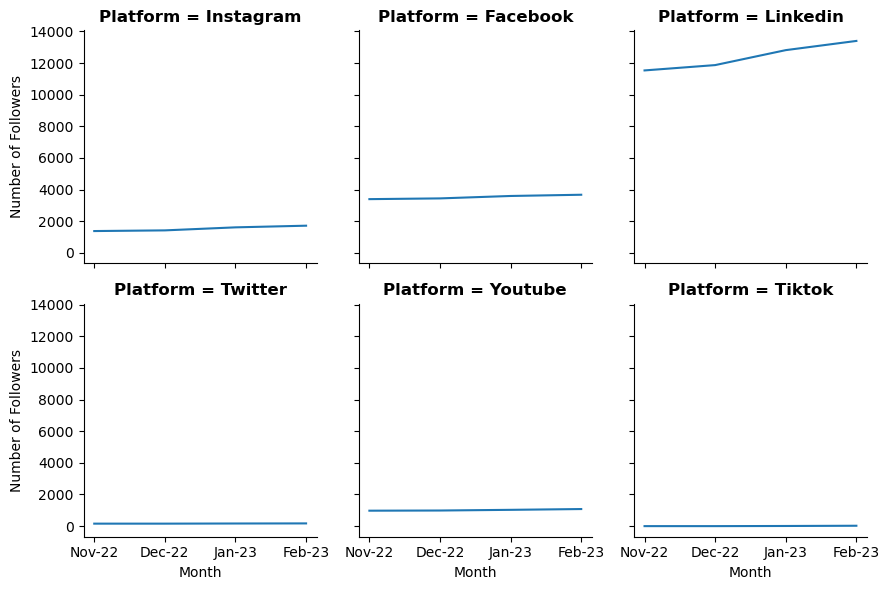

In [55]:
# creating small multiples using Seaborn

import seaborn as sns
import pandas as pd

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(socials, orient='index', columns=['Nov-22', 'Dec-22', 'Jan-23', 'Feb-23'])
df = df.stack().reset_index()
df.columns = ['Platform', 'Month', 'Followers']

# create the small multiples plot
g = sns.FacetGrid(df, col='Platform', col_wrap=3, height=3)
g.map(sns.lineplot, 'Month', 'Followers')

# add x-axis and y-axis labels
g.set_axis_labels('Month', 'Number of Followers')

# adjust the title positions
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=12, fontweight='bold')
    ax.title.set_position([.5, 1.05])

# adjust the spacing
g.tight_layout()

# display the plot
plt.show()



In [56]:
# Heatmap on Instagram Reels Engagement Rate

Instagram_reels.head(20)

,Reel,Duration,Publish Date,Likes,Comments,Saves,Watch Time,Avg Watch Time,Plays,Reach,Engagement Rate
0,Difficult Work Conversations,00:00:10,02/23/2023,3,0,5,00:26:33,00:00:04,345,312,0.025641
1,Funny Cat Video,00:00:24,02/15/2023,8,4,0,02:08:22,00:00:04,1521,1444,0.008310
2,Easy Wins SEO,00:00:35,02/08/2023,1,0,1,00:16:21,00:00:03,228,221,0.009050
3,Google blogs,00:01:09,02/01/2023,10,0,2,00:45:17,00:00:06,402,359,0.033426
4,SEO hacks 1,00:00:58,01/25/2023,14,3,8,00:42:57,00:00:06,381,347,0.072046
5,What is ChatGPT,00:00:26,01/18/2023,15,0,8,00:55:08,00:00:05,565,498,0.046185
6,SEO Blogs,00:00:38,01/11/2023,6,1,5,00:27:20,00:00:04,355,320,0.037500
7,Crious Mind,00:00:09,01/05/2023,12,1,1,00:26:27,00:00:03,381,387,0.036176
8,Job offer,00:00:31,12/21/2022,7,4,4,00:48:08,00:00:06,438,393,0.038168
9,Christmas Offer,00:00:10,12/19/2022,6,3,1,00:23:46,00:00:03,439,378,0.026455


In [57]:
reels_engagement = Instagram_reels[['Reel', 'Engagement Rate']]

In [58]:
reels_engagement.head(20)

,Reel,Engagement Rate
0,Difficult Work Conversations,0.025641
1,Funny Cat Video,0.008310
2,Easy Wins SEO,0.009050
3,Google blogs,0.033426
4,SEO hacks 1,0.072046
5,What is ChatGPT,0.046185
6,SEO Blogs,0.037500
7,Crious Mind,0.036176
8,Job offer,0.038168
9,Christmas Offer,0.026455


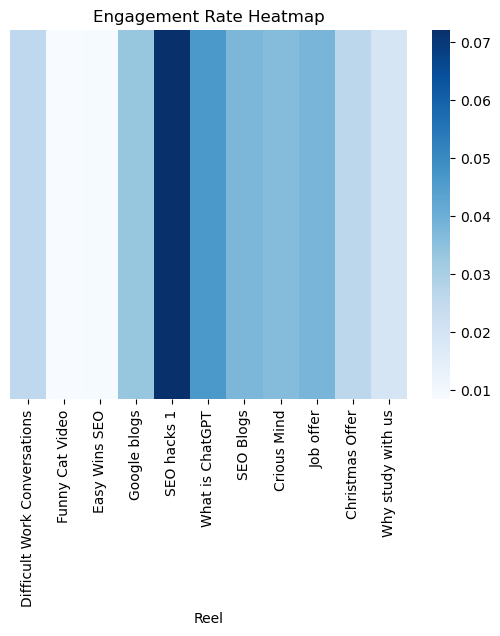

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create a dataframe from the given data
df = pd.DataFrame({
    'Reel': ['Difficult Work Conversations', 'Funny Cat Video', 'Easy Wins SEO', 'Google blogs', 'SEO hacks 1', 
             'What is ChatGPT', 'SEO Blogs', 'Crious Mind', 'Job offer', 'Christmas Offer', 'Why study with us'],
    'Engagement Rate': [0.025641, 0.008310, 0.009050, 0.033426, 0.072046, 0.046185, 0.037500, 0.036176, 
                        0.038168, 0.026455, 0.019355]
})

# reshape the data to create a 2D array
engagement_array = df['Engagement Rate'].values.reshape(1, -1)

# create the heatmap using seaborn
sns.heatmap(engagement_array, cmap='Blues', annot=False, fmt='.4g', xticklabels=df['Reel'], yticklabels=False)

# add labels to the plot
plt.title('Engagement Rate Heatmap')
plt.xlabel('Reel')
plt.ylabel(None)

# display the plot
plt.show()



In [60]:
#reating a scatter plot for Linkedin posts
linkedin_allposts_clean.head()

,post_index,Post title,Created date,Impressions,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Engagement rate
0,0,Don't forget ??\n\nOur webinar is tomorrow ??\nLink to register: https://hubs.la/Q01DCXgW0\n\n#mba #smurfit #economics #ireland,02/28/2023,292,2,0.006849,2,0,1,0.017123
1,1,"CX behavior models & how they can help you to understand your customer better ??\n\nThe Learning Model was influenced by 'Abraham Maslow's Hierarchy of Needs', the model illustrates that consumers will meet their basic needs first before climbing up the funnel. This model is particularly popular in CX to allow marketer's to better understand where their product sits in the model.\n\nWhere does your product sit?\n\n#cx #customerexperience #marketing #marketingtips #sales #digitalmarketing #thelearningmodel",02/28/2023,879,13,0.014790,4,0,0,0.019340
2,2,Congratulations Michael ?? \n\nBest of luck in your job search ?? \n\n#dataanalytics,02/28/2023,764,12,0.015707,9,0,0,0.027487
3,3,"'Celebrate' for working from home ?? | 'Like' for Hybrid ??\n\nWhat does your working arrangements look like, and do you think it works? Let us know below??\n\n#workingfromhome #hybridworking #jobs #career #ireland #dublin",02/27/2023,11031,503,0.045599,255,6,0,0.069169
4,4,NaN,02/27/2023,555,7,0.012613,4,0,0,0.019820


In [61]:
#getting the top 10 post by engagement
sorted_Linkedin_Top_Posts = linkedin_allposts_clean.sort_values(by='Engagement rate', ascending=False).head(10)
sorted_Linkedin_Top_Posts.head(10)

,post_index,Post title,Created date,Impressions,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Engagement rate
111,111,Individuals working in HR have the power to transform the entire organisation and shape the company culture for the better ?? \n\nIf you are thinking about pursuing a career in HR then check out our recent blog. In this blog we compiled a helpful guide to various HR career paths ?? \n\nhttps://lnkd.in/gCkfEvXi\n\n\n#hr #hrcommunity #hrcareers #humanresources #humanresourcesmanagement #culture #power #career,01/18/2023,2672,1202,0.449850,20,1,3,0.458458
32,32,Your path to a new role starts here ?? \n\n#ucdalumni #newjob #newjobopportunity #newjobalert #jobsearching #jobsireland #careergoals #careersireland #careerdevelopment,02/10/2023,1981,856,0.432105,18,0,3,0.441696
59,59,Do you employ a Data Analyst in your company? \n\nData analytics helps organisations extract the raw data and convert it into valuable insights. This helps them make informed decisions and devise a more effective business strategy ?? \n\nRead more here: https://lnkd.in/eJ8CPTTj\n\n#data #datacollection #dataanalytics #dataanalysis #dataanalyst,02/01/2023,1576,586,0.371827,5,0,1,0.375635
16,16,"What AI tools do you use? Comment below ?? \n\nEvery marketer knows that time is of the essence ? With AI soaring, there is no better time to avail of some of the really cool tools/websites to help take your marketing campaign from strength to strength, saving you hours of time in the process ??\n\nCheck out our 6 favourite AI tools that you can use in your marketing campaigns ?? \n\n#ai #artificialintelligence #marketing #marketingtips #digitalmarketing #aimarketing #ireland #dublin #cork",02/20/2023,1912,676,0.353556,11,4,1,0.360356
10,10,??New Courses - Just Launched??\n\nWe are very excited to bring you three new courses ??\n\nFind out more about each course here ??https://lnkd.in/eADaX4hy\n\nStart something new today ??\n\n#diversity #equity #equality #belonging #inclusion #problemsolving #videoediting #premierepro #upskilling #careerdevelopment #irelandjobs #irelandcareers #newjobireland #newjob #dublin #dublinjobs,02/22/2023,2142,523,0.244164,25,0,8,0.258637
71,71,A brief timeline of Instagram's history ?? \nReels were revolutionary as Instagram began to compete with TikTok... what do you think is next? Leave your thoughts below ?? \n\n\n#instagram #instagrammarketing #instagramgrowth #marketing #digitalamarketing #tiktok #tiktokmarketing,01/30/2023,1192,293,0.245805,4,0,0,0.249161
22,22,Read this ?? \n\nIt's so great to see our student's bring their learning into their day to day practice ?? \n\nYour digital marketing career is about to kick off Vivianne ?? \n\n\n#digitalamarketing #marketing,02/16/2023,1208,212,0.175497,4,0,0,0.178808
6,6,?? Student Highlight ?? \n\nGrainne took our Professional Academy Diploma in Graphic Design and here is what she had to say about it ?? \n\n#graphicdesign #graphicdesigner #graphicdesigns #careergoals #careerdevelopment,02/24/2023,1075,184,0.171163,5,0,0,0.175814
182,182,"Is your organisation prepared to face workforce challenges in 2023?\n\nA recent research report by UCD Professional Academy revealed that employers and workers in Ireland are willing and eager to engage in upskilling. As the rate of economic change accelerates, continuous professional development will play an ever-increasing role in unlocking both the professional potential of individuals and the wider economic potential of Ireland. \n\nWatch the full webinar here: https://bit.ly/3Ym7GPo\n\n#upskillingireland #irelandsjobs #careerdevelopment #2023trends #workforcedevelopment #report",12/14/2022,1462,216,0.147743,15,0,2,0.158687
93,93,"This comprehensive Professional Course in Digital Marketing will give you the key skills to build digital marketing strategies from scratch. You will learn the use of channels such as social media, paid search, organic reach, and PR, while developing skills in content creation, content distribution, en

In [62]:
#segementing the engagement rate and title columns only
linkedin_engagement = sorted_Linkedin_Top_Posts[['Post title', 'Engagement rate']]

In [63]:
linkedin_engagement.head(10)

,Post title,Engagement rate
111,Individuals working in HR have the power to transform the entire organisation and shape the company culture for the better ?? \n\nIf you are thinking about pursuing a career in HR then check out our recent blog. In this blog we compiled a helpful guide to various HR career paths ?? \n\nhttps://lnkd.in/gCkfEvXi\n\n\n#hr #hrcommunity #hrcareers #humanresources #humanresourcesmanagement #culture #power #career,0.458458
32,Your path to a new role starts here ?? \n\n#ucdalumni #newjob #newjobopportunity #newjobalert #jobsearching #jobsireland #careergoals #careersireland #careerdevelopment,0.441696
59,Do you employ a Data Analyst in your company? \n\nData analytics helps organisations extract the raw data and convert it into valuable insights. This helps them make informed decisions and devise a more effective business strategy ?? \n\nRead more here: https://lnkd.in/eJ8CPTTj\n\n#data #datacollection #dataanalytics #dataanalysis #dataanalyst,0.375635
16,"What AI tools do you use? Comment below ?? \n\nEvery marketer knows that time is of the essence ? With AI soaring, there is no better time to avail of some of the really cool tools/websites to help take your marketing campaign from strength to strength, saving you hours of time in the process ??\n\nCheck out our 6 favourite AI tools that you can use in your marketing campaigns ?? \n\n#ai #artificialintelligence #marketing #marketingtips #digitalmarketing #aimarketing #ireland #dublin #cork",0.360356
10,??New Courses - Just Launched??\n\nWe are very excited to bring you three new courses ??\n\nFind out more about each course here ??https://lnkd.in/eADaX4hy\n\nStart something new today ??\n\n#diversity #equity #equality #belonging #inclusion #problemsolving #videoediting #premierepro #upskilling #careerdevelopment #irelandjobs #irelandcareers #newjobireland #newjob #dublin #dublinjobs,0.258637
71,A brief timeline of Instagram's history ?? \nReels were revolutionary as Instagram began to compete with TikTok... what do you think is next? Leave your thoughts below ?? \n\n\n#instagram #instagrammarketing #instagramgrowth #marketing #digitalamarketing #tiktok #tiktokmarketing,0.249161
22,Read this ?? \n\nIt's so great to see our student's bring their learning into their day to day practice ?? \n\nYour digital marketing career is about to kick off Vivianne ?? \n\n\n#digitalamarketing #marketing,0.178808
6,?? Student Highlight ?? \n\nGrainne took our Professional Academy Diploma in Graphic Design and here is what she had to say about it ?? \n\n#graphicdesign #graphicdesigner #graphicdesigns #careergoals #careerdevelopment,0.175814
182,"Is your organisation prepared to face workforce challenges in 2023?\n\nA recent research report by UCD Professional Academy revealed that employers and workers in Ireland are willing and eager to engage in upskilling. As the rate of economic change accelerates, continuous professional development will play an ever-increasing role in unlocking both the professional potential of individuals and the wider economic potential of Ireland. \n\nWatch the full webinar here: https://bit.ly/3Ym7GPo\n\n#upskillingireland #irelandsjobs #careerdevelopment #2023trends #workforcedevelopment #report",0.158687
93,"This comprehensive Professional Course in Digital Marketing will give you the key skills to build digital marketing strategies from scratch. You will learn the use of channels such as social media, paid search, organic reach, and PR, while developing skills in content creation, content distribution, engagement, optimisation, using video, and email marketing ??\nDownload our FREE brochure ??https://lnkd.in/eyZ_bnJ9\n\n\n#digitalmarketing #marketing #socialmediacourses #socialmedia #seo #searchengineoptimization #ppc #contentcreation #pr #videocontent #careerdevelopment #irelandcourses #irelandjobs #irelandcareers",0.140722


In [64]:
#shortening the 'post title' to make it more readable when it is translated to a graph

# create a new column "Shortened title" that contains only the first 6 words of "Post title"
linkedin_engagement['Shortened title'] = linkedin_engagement['Post title'].apply(lambda x: ' '.join(x.split()[:6]))

# print the resulting dataframe
print(linkedin_engagement)




                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Post title  \
111                                                                                                                                                                                                                  Individuals working in HR have the power to transform the entire organisation and shape the company culture for the better ?? \n\nIf you are thinking about pur

C:\Users\whela\AppData\Local\Temp\ipykernel_13560\2551187922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linkedin_engagement['Shortened title'] = linkedin_engagement['Post title'].apply(lambda x: ' '.join(x.split()[:6]))


In [65]:
linkedin_engagement['Shortened title'].head(10)

111                   Individuals working in HR have the
32                               Your path to a new role
59                          Do you employ a Data Analyst
16                             What AI tools do you use?
10                    ??New Courses - Just Launched?? We
71               A brief timeline of Instagram's history
22                            Read this ?? It's so great
6                   ?? Student Highlight ?? Grainne took
182                Is your organisation prepared to face
93     This comprehensive Professional Course in Digital
Name: Shortened title, dtype: object

In [66]:
Linkedin_clean = linkedin_engagement[['Shortened title','Engagement rate']]
Linkedin_clean.head(10)

,Shortened title,Engagement rate
111,Individuals working in HR have the,0.458458
32,Your path to a new role,0.441696
59,Do you employ a Data Analyst,0.375635
16,What AI tools do you use?,0.360356
10,??New Courses - Just Launched?? We,0.258637
71,A brief timeline of Instagram's history,0.249161
22,Read this ?? It's so great,0.178808
6,?? Student Highlight ?? Grainne took,0.175814
182,Is your organisation prepared to face,0.158687
93,This comprehensive Professional Course in Digital,0.140722


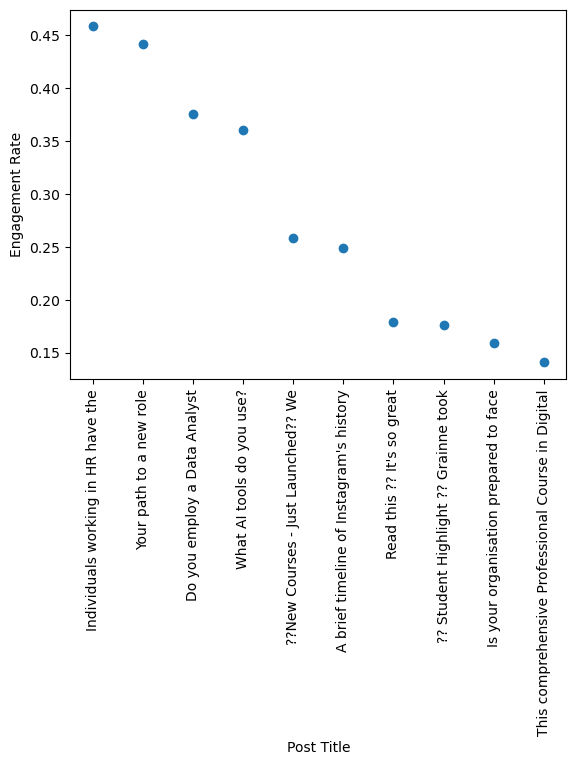

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Set the x and y values for the scatter plot
x = linkedin_engagement['Shortened title']
y = linkedin_engagement['Engagement rate']

# Create the scatter plot
ax.scatter(x, y)

# Set the x-label and y-label
ax.set_xlabel('Post Title')
ax.set_ylabel('Engagement Rate')

# Rotate x-labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [3]:
#connecting to the NewsAPI to find / brainstorm more content for Linkedin/Instagram
#my API key is 1fbac2bb88df428bb1596aa92b574022

import requests

In [4]:
API_KEY = '1fbac2bb88df428bb1596aa92b574022'

In [14]:
url = 'https://newsapi.org/v2/everything?q=Dublin&language=en&sortBy=publishedAt&apiKey=' + API_KEY

response = requests.get(url)
data = response.json()

articles = data['articles']
for article in articles:
    title = article['title']
    description = article['description']
    print(title, '-', description)

County-by-county guide to 2023 Ulster Championship - A look at how the nine Ulster counties are shaping up ahead of the start of the championship season on Saturday.
Dublin Lotto player scoops €500,000 in Daily Million draw - A lucky Lotto player in Dublin has scooped €500,000 in Tuesday&rsquo;s Daily Million Plus draw.
The 8 at 8: Thursday - Concerns over breadth of people being affected by housing crisis; Man arrested in connection with murder of Eddie Hutch Snr.
US president Joe Biden to visit UK for state visit after the King’s invitation, White House confirms - White House spokeswoman press secretary Karine Jean-Pierre said that Joe Biden accepted the invite
Publication of 2022 Sustainability Report - (marketscreener.com) 
 Kenmare Resources plc   6 April 2023   Publication of 2022 Sustainability Report   Kenmare Resources plc , one of the leading global producers of titanium minerals and zircon, which operates the Moma Titanium Minerals Mine in northern M…
Publication of 2022 Ann

In [21]:
#turning this data into a datframe for easy analysis

import pandas as pd

articles = data['articles']
article_list = []

for article in articles:
    title = article['title']
    description = article['description']
    article_list.append({'title': title, 'description': description})
    
dailynews_dublin = pd.DataFrame(article_list)
print(dailynews_dublin)


                                                title  \
0   County-by-county guide to 2023 Ulster Champion...   
1   Dublin Lotto player scoops €500,000 in Daily M...   
2                                The 8 at 8: Thursday   
3   US president Joe Biden to visit UK for state v...   
4           Publication of 2022 Sustainability Report   
..                                                ...   
95  ‘The Indo Daily’ podcast wins top prize at Eur...   
96  Rodenticide Global Market Report 2023: Increas...   
97  Rodenticide Global Market Report 2023: Increas...   
98  ‘My head wasn't in the right place’ – Ali Coot...   
99  Global Heavy Duty Conveyor Belts Market Report...   

                                          description  
0   A look at how the nine Ulster counties are sha...  
1   A lucky Lotto player in Dublin has scooped €50...  
2   Concerns over breadth of people being affected...  
3   White House spokeswoman press secretary Karine...  
4   (marketscreener.com) \n Kenmare

In [12]:
dailynews_dublin.head(20)

,title,description
0,County-by-county guide to 2023 Ulster Champion...,A look at how the nine Ulster counties are sha...
1,"Dublin Lotto player scoops €500,000 in Daily M...",A lucky Lotto player in Dublin has scooped €50...
2,The 8 at 8: Thursday,Concerns over breadth of people being affected...
3,US president Joe Biden to visit UK for state v...,White House spokeswoman press secretary Karine...
4,Publication of 2022 Sustainability Report,(marketscreener.com) \n Kenmare Resources plc ...
5,Publication of 2022 Annual Report,(marketscreener.com) Kenmare Resources plc 6...
6,Publication of 2022 Sustainability Report,(marketscreener.com) Kenmare Resources plc 6...
7,Publication of 2022 Sustainability Report,Kenmare Resources plc (“Kenmare” or “the Compa...
8,Publication of 2022 Sustainability Report,Kenmare Resources plc (“Kenmare” or “the...
9,Publication of 2022 Annual Report,Kenmare Resources plc (“Kenmare” o...
